# Project 1

## Step 1: Load the data and perform basic operations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline



# Project 1:  Problem Statement

For our first project, we're going to take a look at SAT and ACT scores around the United States. Suppose that the College Board - the organization that administers the SAT - seeks to improve the participation rate of its exams. Your presentation should be geared toward **non-technical** executives with the College Board and you will use, at minimum, the provided data to make recommendations about how the College Board might work to increase the participation rates of these exams.

##### 1. Load the data in using pandas.

In [71]:
sat_data = pd.read_csv('../data/sat.csv',index_col=0)
act_data = pd.read_csv('../data/act.csv',index_col=0)

In [72]:
sat_data.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [73]:
df_sat = pd.DataFrame(sat_data)
df_act = pd.DataFrame(act_data)

##### 2. Print the first ten rows of each dataframe.

In [74]:
df_sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [102]:
df_act[0:10]

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

act_data:  
> - State - location for wehre the data was sampled
> - Participation - out of the school populations within the location the participation rate
> - English,Math,Reading,Science - scores for these categories
> - Composite- avg of all categories
  
sat_data:
> - State - location for wehre the data was sampled
> - Participation - out of the school populations within the location the participation rate
> - Evidence Base Reading and Writing - score for this category
> - Math - score for this category
> - Total - sum of the cateogry scores


##### 4. Does the data look complete? Are there any obvious issues with the observations?

> - Low participation rates in both data sets do not seem like a good representation of the populations' score.
> - act scores are floats 
> - sat sores are integers
> - participation rates for both sets are objects
> - act has 51 rows and sat has 52 rows

In [103]:
print(df_sat.info())
print('-----------------------')
print(df_act.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State            51 non-null object
Participation    51 non-null float64
Read_Writing     51 non-null float64
Math             51 non-null float64
Total            51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB
None
-----------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB
None


##### 5. Print the types of each column.

In [104]:
print('SAT Data '),
print(df_sat.dtypes)
print('-------------------------------')
print('ACT Data')
print(df_act.dtypes)

SAT Data 
State             object
Participation    float64
Read_Writing     float64
Math             float64
Total            float64
dtype: object
-------------------------------
ACT Data
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [105]:
#converting int64 datatypes in SAT scores to a float
df_sat['Total'] = df_sat['Total'].astype(float)
df_sat['Math'] = df_sat['Math'].astype(float)

#Change Long title to something shorter
df_sat.rename(index=str, columns={"Evidence-Based Reading and Writing":"Read_Writing"},inplace=True)

In [106]:
df_sat['Read_Writing'] = df_sat['Read_Writing'].astype(float)

In [107]:
df_sat.dtypes

State             object
Participation    float64
Read_Writing     float64
Math             float64
Total            float64
dtype: object

In [108]:
df_sat.head(3)

,State,Participation,Read_Writing,Math,Total
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0
2,Arizona,0.30,563.0,553.0,1116.0


In [109]:
#Removing the % sign and converting Object to an Int 
df_sat['Participation'] = df_sat['Participation'].str.replace('%', '').astype(int)
df_act['Participation'] = df_act['Participation'].str.replace('%', '').astype(int)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [110]:
df_sat.head(3)

,State,Participation,Read_Writing,Math,Total
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0
2,Arizona,0.30,563.0,553.0,1116.0


In [111]:
#Dividing the integers to make them into decimals
df_sat['Participation'] = df_sat['Participation'].div(100)
df_act['Participation'] = df_act['Participation'].div(100)

In [112]:
#Verification of the data type change for Partcipation to int64

print('ACT '),
print(df_act.dtypes)
print('-------------------------------')
print('SAT')
print(df_sat.dtypes)

ACT 
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
-------------------------------
SAT
State             object
Participation    float64
Read_Writing     float64
Math             float64
Total            float64
dtype: object


In [113]:
df_sat.head()

,State,Participation,Read_Writing,Math,Total
0,Alabama,0.0005,593.0,572.0,1165.0
1,Alaska,0.0038,547.0,533.0,1080.0
2,Arizona,0.0030,563.0,553.0,1116.0
3,Arkansas,0.0003,614.0,594.0,1208.0
4,California,0.0053,531.0,524.0,1055.0


In [114]:
df_act.tail(5)

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,0.0029,23.5,23.3,24.6,23.5,23.8
48,Washington,0.0029,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.0069,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,0.0100,19.7,20.4,20.6,20.9,20.5
51,Wyoming,0.0100,19.4,19.8,20.8,20.6,20.2


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [115]:
df_sat.columns.get_loc('Read_Writing') #retrieving the index of the header title (Excel match()--> index)

2

In [116]:
for data in df_sat['Math']:
    print(data)

572.0
533.0
553.0
594.0
524.0
595.0
512.0
492.0
468.0
497.0
515.0
541.0
493.0
556.0
532.0
635.0
628.0
616.0
586.0
499.0
52.0
551.0
495.0
651.0
607.0
631.0
591.0
625.0
553.0
520.0
526.0
561.0
523.0
535.0
621.0
570.0
517.0
548.0
531.0
524.0
521.0
603.0
604.0
507.0
614.0
551.0
541.0
534.0
528.0
649.0
604.0


In [117]:

def thaDictMaka(df, key, value):
    thaDict = {}
    for row in range(len(df)):
        thaDict[df[key].iloc[row]] = df[value].iloc[row]
    return(thaDict)

In [118]:
satd_r=thaDictMaka(df_sat, 'State', 'Read_Writing')
satd_m=thaDictMaka(df_sat, 'State', 'Math')
satd_t=thaDictMaka(df_sat, 'State', 'Total')

actd_e=thaDictMaka(df_act, 'State', 'English')
actd_m=thaDictMaka(df_act, 'State', 'Math')
actd_r=thaDictMaka(df_act, 'State', 'Reading')
actd_s=thaDictMaka(df_act, 'State', 'Science')
actd_c=thaDictMaka(df_act, 'State', 'Composite')

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [119]:
# dict ={}
# dict['State'] = [df_sat['State']]
# dict

In [120]:
def col_dict(df):
    col_dict = {}
    for i in df.columns:
        col_dict[i] = df[i]
        
    return(col_dict)

In [121]:
s_col_d = col_dict(df_sat)
a_col_d = col_dict(df_act)

In [122]:
print(s_col_d)

{'State': 0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                

##### 9. Merge the dataframes on the state column.

In [123]:
merge_data = pd.merge(df_sat,df_act,on='State')
merge_data['State']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [124]:
merge_data.rename(index=str, columns={'Participation_x':'SAT_Participation',
                                      'Read_Writing':'SAT_ReadWrite',
                                      'Math_x':'SAT_Math',
                                      'Total':'SAT_Total',
                                      'Participation_y':'ACT_Participation',
                                      'English':'ACT_English',
                                      'Math_y':'ACT_Math',
                                      'Reading':'ACT_Reading',
                                      'Science':'ACT_Science',
                                      'Composite':'ACT_Composite'},inplace=True)

In [125]:
merge_data.head()

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,0.0005,593.0,572.0,1165.0,0.0100,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.0038,547.0,533.0,1080.0,0.0065,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.0030,563.0,553.0,1116.0,0.0062,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.0003,614.0,594.0,1208.0,0.0100,18.9,19.0,19.7,19.5,19.4
4,California,0.0053,531.0,524.0,1055.0,0.0031,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [126]:
print('MAX \n{}\n MIN \n{}'.format(merge_data.max()[1:],merge_data.min()[1:]))

MAX 
SAT_Participation    0.01
SAT_ReadWrite         644
SAT_Math              651
SAT_Total            1295
ACT_Participation    0.01
ACT_English          25.5
ACT_Math             25.3
ACT_Reading            26
ACT_Science          24.9
ACT_Composite        25.5
dtype: object
 MIN 
SAT_Participation    0.0002
SAT_ReadWrite           482
SAT_Math                 52
SAT_Total               950
ACT_Participation    0.0008
ACT_English            16.3
ACT_Math                 18
ACT_Reading            18.1
ACT_Science             2.3
ACT_Composite          17.8
dtype: object


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [127]:
def mySTDs(df):
    return [ df[col].std() for col in 
            df.select_dtypes(include = ['float', 'int']).columns.tolist()[:] ]

In [128]:
merge_data.select_dtypes(include = ['float','int']).columns.tolist()[:]

['SAT_Participation',
 'SAT_ReadWrite',
 'SAT_Math',
 'SAT_Total',
 'ACT_Participation',
 'ACT_English',
 'ACT_Math',
 'ACT_Reading',
 'ACT_Science',
 'ACT_Composite']

In [129]:
# def mySTDs(df):    
#     sd = []
#     for col in df.select_dtypes(include = ['float','int']).columns.tolist()[:]:
#         sd.append(df[col].std())

#     return(sd)

In [130]:
mySTDs(merge_data)

[0.0035276632270013039,
 45.666901387689322,
 84.90911865855486,
 92.494811725190459,
 0.0032140842015886827,
 2.3536771398030303,
 1.9819894936505533,
 2.0672706264873146,
 3.1824629751554525,
 2.0206948911543412]

In [131]:
sd = mySTDs(merge_data)

In [132]:
len(sd)

10

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [133]:
sd_observation = ['National_STD']
for std in sd:
    sd_observation.append(std)

sd_observation   

['National_STD',
 0.0035276632270013039,
 45.666901387689322,
 84.90911865855486,
 92.494811725190459,
 0.0032140842015886827,
 2.3536771398030303,
 1.9819894936505533,
 2.0672706264873146,
 3.1824629751554525,
 2.0206948911543412]

In [134]:
# Adding STD data to the bottom of the DataFrame
merge_data.loc[52] = sd_observation

merge_data = merge_data.iloc[:52,:]
merge_data.tail(3)

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
49,Wisconsin,0.000300,642.000000,649.000000,1291.000000,0.010000,19.700000,20.400000,20.600000,20.900000,20.500000
50,Wyoming,0.000300,626.000000,604.000000,1230.000000,0.010000,19.400000,19.800000,20.800000,20.600000,20.200000
52,National_STD,0.003528,45.666901,84.909119,92.494812,0.003214,2.353677,1.981989,2.067271,3.182463,2.020695


In [135]:
merge_data.sort_values('SAT_Participation')

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
34,North Dakota,0.000200,635.000000,621.000000,1256.000000,0.009800,19.000000,20.400000,20.500000,20.600000,20.300000
24,Mississippi,0.000200,634.000000,607.000000,1242.000000,0.010000,18.200000,18.100000,18.800000,18.800000,18.600000
15,Iowa,0.000200,641.000000,635.000000,1275.000000,0.006700,21.200000,21.300000,22.600000,22.100000,21.900000
25,Missouri,0.000300,640.000000,631.000000,1271.000000,0.010000,19.800000,19.900000,20.800000,20.500000,20.400000
49,Wisconsin,0.000300,642.000000,649.000000,1291.000000,0.010000,19.700000,20.400000,20.600000,20.900000,20.500000
44,Utah,0.000300,624.000000,614.000000,1238.000000,0.010000,19.500000,19.900000,20.800000,20.600000,20.300000
3,Arkansas,0.000300,614.000000,594.000000,1208.000000,0.010000,18.900000,19.000000,19.700000,19.500000,19.400000
41,South Dakota,0.000300,612.000000,603.000000,1216.000000,0.008000,20.700000,21.500000,22.300000,22.000000,21.800000
27,Nebraska,0.000300,629.000000,625.000000,1253.000000,0.008400,20.900000,20.900000,21.900000,21.500000,21.400000
50,Wyoming,0.000300,626.000000,604.000000,1230.000000,0.010000,19.400000,19.800000,20.800000,20.600000,20.200000


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [148]:
print(merge_data[merge_data['ACT_Participation']>=0.5])

Empty DataFrame
Columns: [State, SAT_Participation, SAT_ReadWrite, SAT_Math, SAT_Total, ACT_Participation, ACT_English, ACT_Math, ACT_Reading, ACT_Science, ACT_Composite]
Index: []


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [137]:
#Need to remove National STD row from the data set before checking the distributions
merge_data_hist = merge_data.iloc[:51,:]

In [138]:
merge_data_hist

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
0,Alabama,0.0005,593.0,572.0,1165.0,0.0100,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.0038,547.0,533.0,1080.0,0.0065,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.0030,563.0,553.0,1116.0,0.0062,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.0003,614.0,594.0,1208.0,0.0100,18.9,19.0,19.7,19.5,19.4
4,California,0.0053,531.0,524.0,1055.0,0.0031,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.0011,606.0,595.0,1201.0,0.0100,20.1,20.3,21.2,20.9,20.8
6,Connecticut,0.0100,530.0,512.0,1041.0,0.0031,25.5,24.6,25.6,24.6,25.2
7,Delaware,0.0100,503.0,492.0,996.0,0.0018,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,0.0100,482.0,468.0,950.0,0.0032,24.4,23.5,24.9,23.5,24.2
9,Florida,0.0083,520.0,497.0,1017.0,0.0073,19.0,19.4,21.0,19.4,19.8


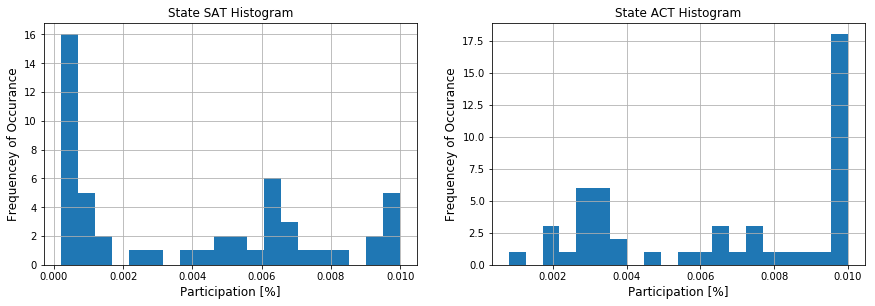

In [139]:
plt.figure(1)

plt.subplot(121)
plt.hist(merge_data_hist['SAT_Participation'], 20)
plt.xlabel('Participation [%]', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('State SAT Histogram')
plt.grid(True)

plt.subplot(122)
plt.hist(merge_data_hist['ACT_Participation'], 20)
plt.xlabel('Participation [%]', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('State ACT Histogram')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=.08, left=.10, right=2, hspace=0.6,
                    wspace=0.2)

##### 17. Plot the Math(s) distributions from both data sets.

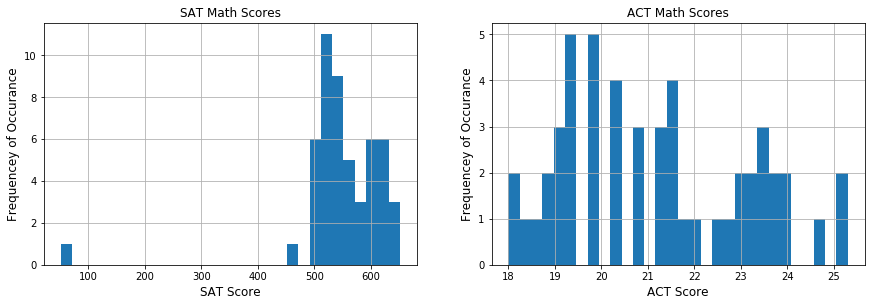

In [140]:

plt.figure(1)

plt.subplot(121)
plt.hist(merge_data_hist['SAT_Math'], 30)
plt.xlabel('SAT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('SAT Math Scores')
plt.grid(True)

plt.subplot(122)
plt.hist(merge_data_hist['ACT_Math'], 30)
plt.xlabel('ACT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('ACT Math Scores')
plt.grid(True)



plt.subplots_adjust(top=0.92, bottom=.08, left=.10, right=2, hspace=0.6,
                    wspace=0.2)

##### 18. Plot the Verbal distributions from both data sets.

In [141]:
merge_data[:0]

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite


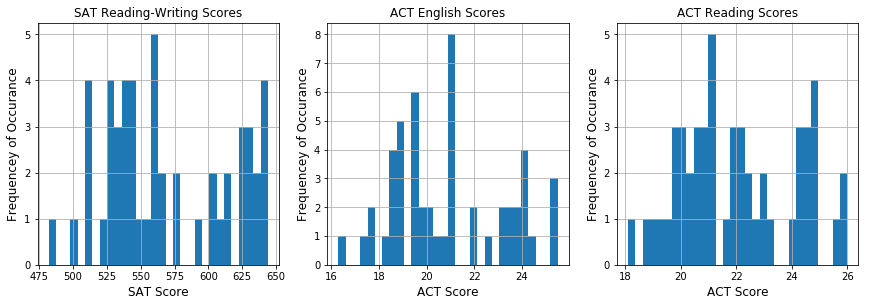

In [142]:
plt.figure(1)

plt.subplot(131)
plt.hist(merge_data_hist['SAT_ReadWrite'], 30)
plt.xlabel('SAT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('SAT Reading-Writing Scores')
plt.grid(True)

plt.subplot(132)
plt.hist(merge_data_hist['ACT_English'], 30)
plt.xlabel('ACT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('ACT English Scores')
plt.grid(True)

plt.subplot(133)
plt.hist(merge_data_hist['ACT_Reading'], 30)
plt.xlabel('ACT Score', fontsize='large')
plt.ylabel('Frequencey of Occurance', fontsize='large')
plt.title('ACT Reading Scores')
plt.grid(True)


plt.subplots_adjust(top=0.92, bottom=.08, left=.10, right=2, hspace=0.6,
                    wspace=0.2)

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

 - The most common distribution assumption made is a normal distribution.  

##### 20. Does this assumption hold true for any of our columns? Which?

 - Without the one extreme low outlier, SAT Math scores appear to have a normal distribution.

##### 21. Plot some scatterplots examining relationships between all variables.

In [145]:
import seaborn as sns ;sns.set(style="ticks", color_codes=True)

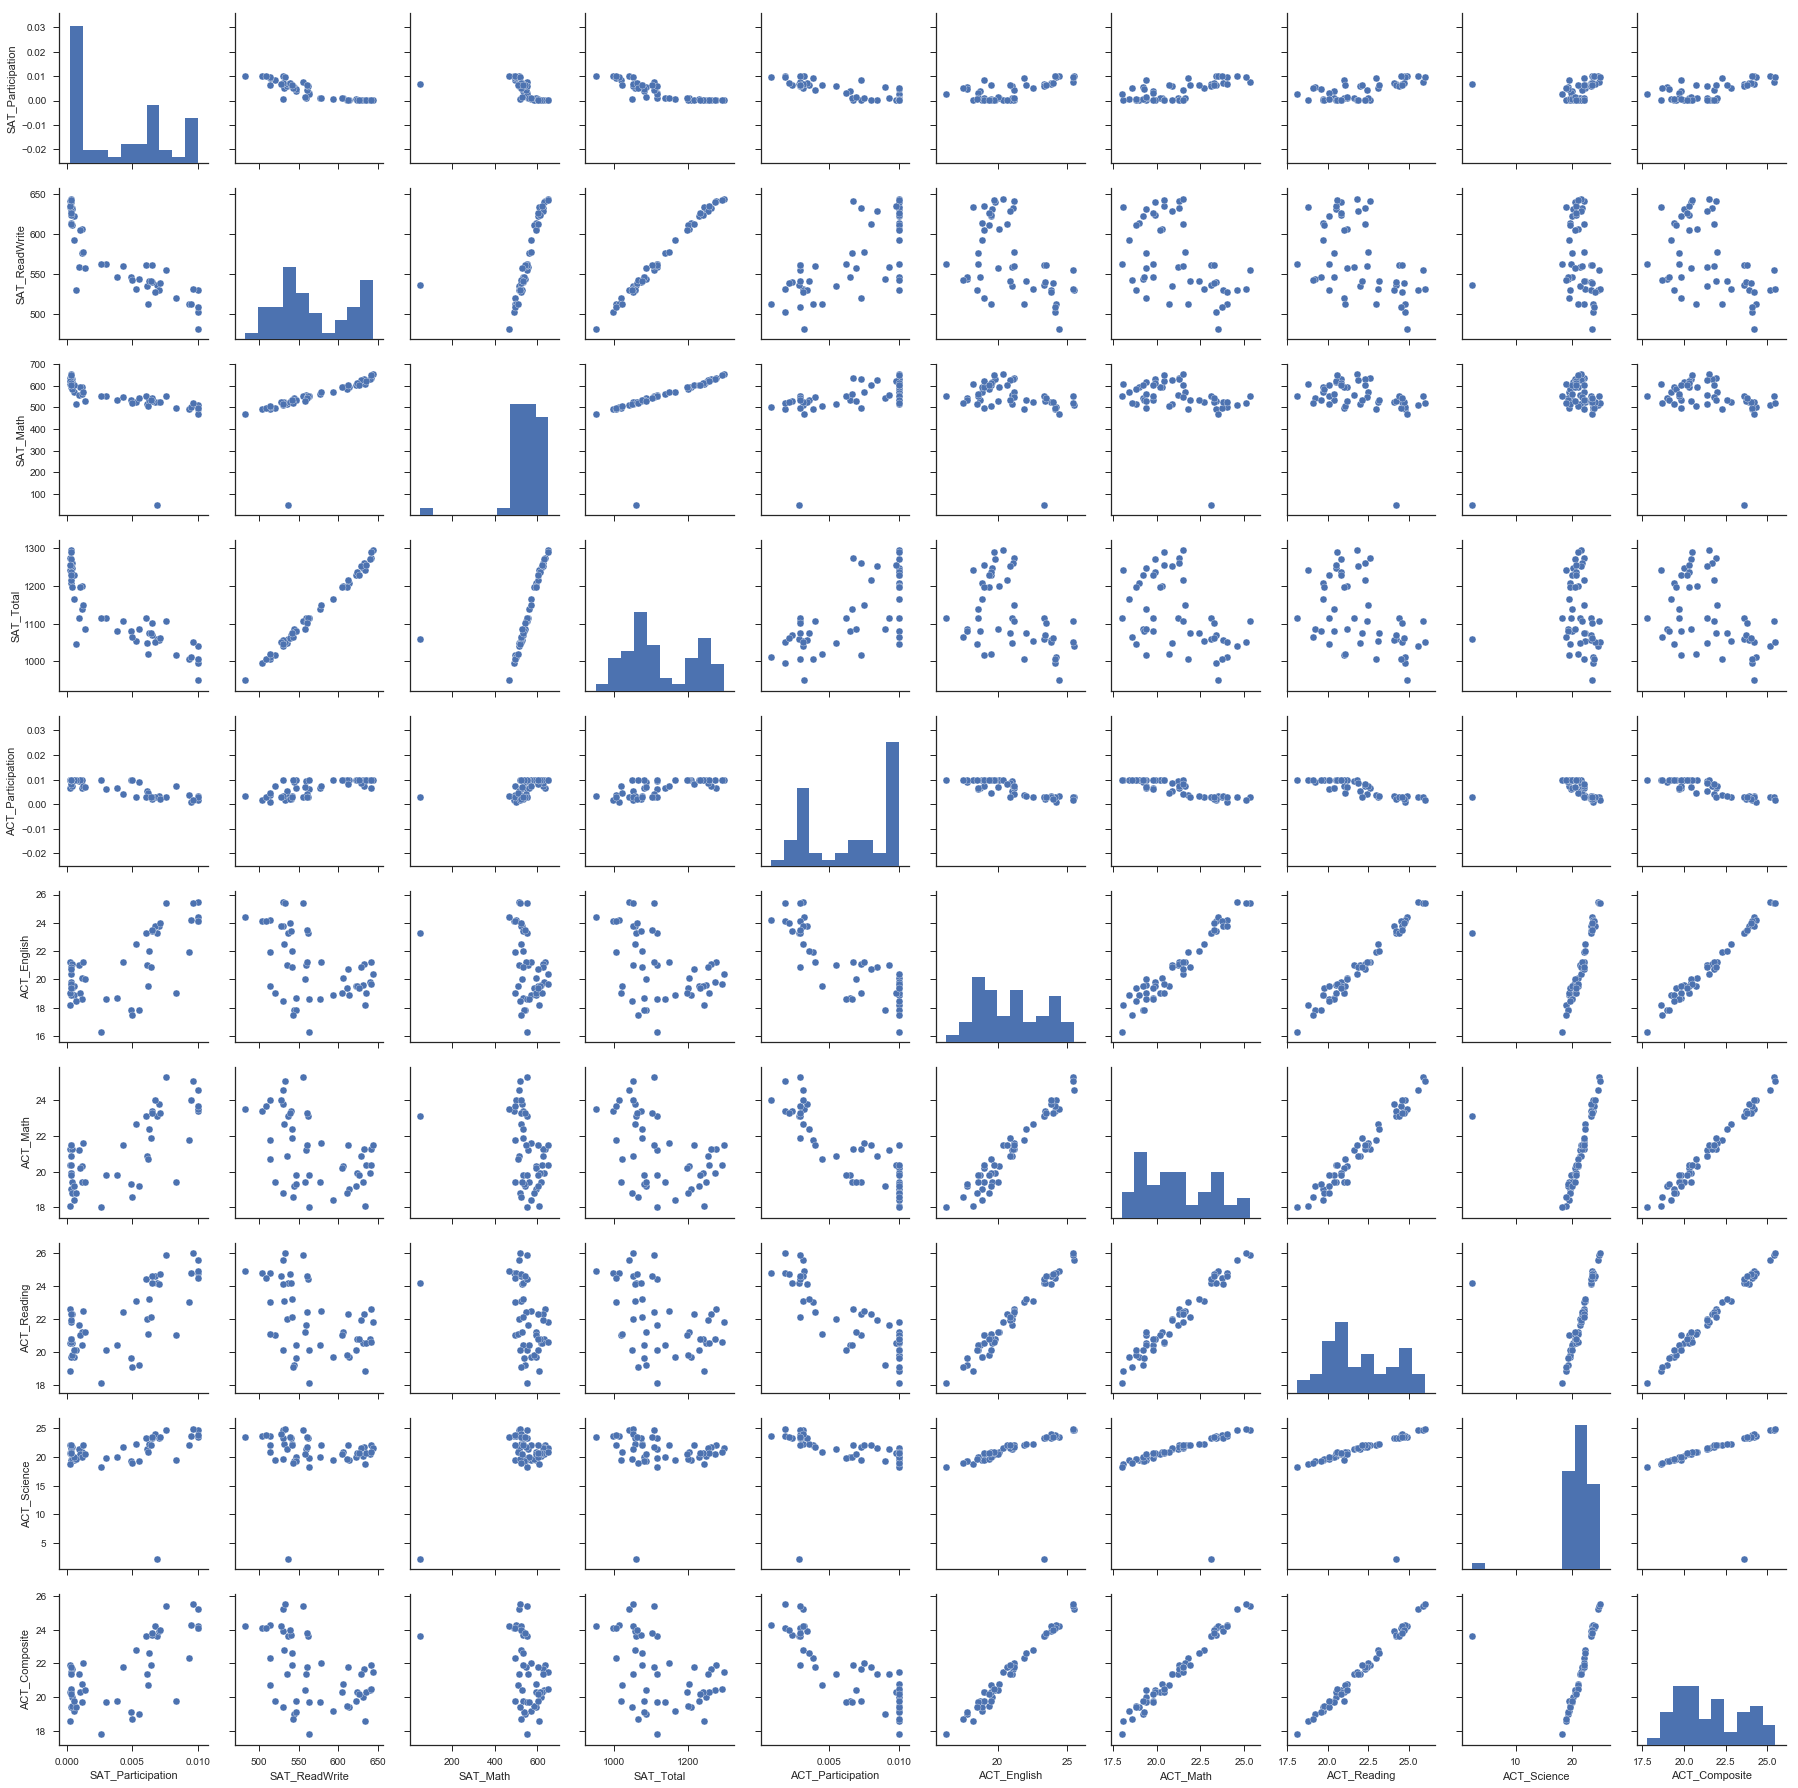

In [146]:
relate = sns.pairplot(merge_data_hist)

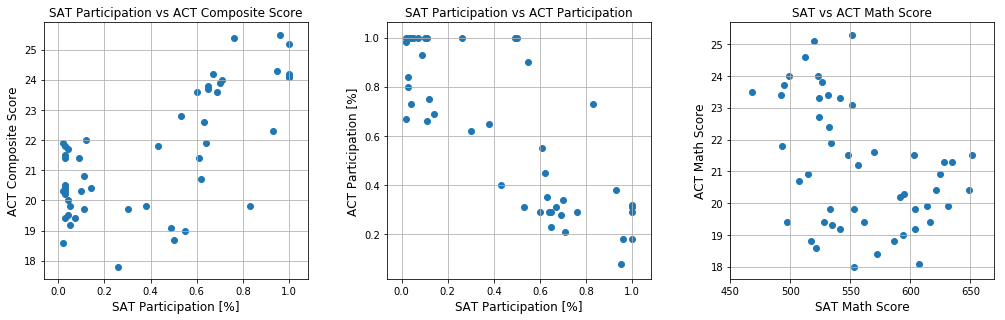

In [48]:
plt.figure(1)

plt.subplot(131)
plt.scatter(merge_data_hist['SAT_Participation'],merge_data_hist['ACT_Composite'])
plt.xlabel('SAT Participation [%]', fontsize='large')
plt.ylabel('ACT Composite Score', fontsize='large')
plt.title('SAT Participation vs ACT Composite Score', fontsize='large')
plt.grid(True)

plt.subplot(132)
plt.scatter(merge_data_hist['SAT_Participation'],merge_data_hist['ACT_Participation'])
plt.xlabel('SAT Participation [%]', fontsize='large')
plt.ylabel('ACT Participation [%]', fontsize='large')
plt.title('SAT Participation vs ACT Participation', fontsize='large')
plt.grid(True)


plt.subplot(133)
plt.scatter(merge_data_hist['SAT_Math'],merge_data_hist['ACT_Math'])
plt.xlabel('SAT Math Score', fontsize='large')
plt.ylabel('ACT Math Score', fontsize='large')
plt.title('SAT vs ACT Math Score', fontsize='large')
plt.xlim(450, 670)
plt.grid(True)

plt.subplots_adjust(top=0.9, 
                    bottom=.01, 
                    left=.2, 
                    right=2.4, 
                    hspace=.8,
                    wspace=0.3)

##### 22. Are there any interesting relationships to note?

 - As SAT_Participation increases so dose the ACT_Composite score
 - As SAT_Participation increases ACT Participation decreases
 - As SAT_Participation increases so do ACT scores

##### 23. Create box plots for each variable. 

In [49]:
merge_data_hist.head(0)

,State,SAT_Participation,SAT_ReadWrite,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite


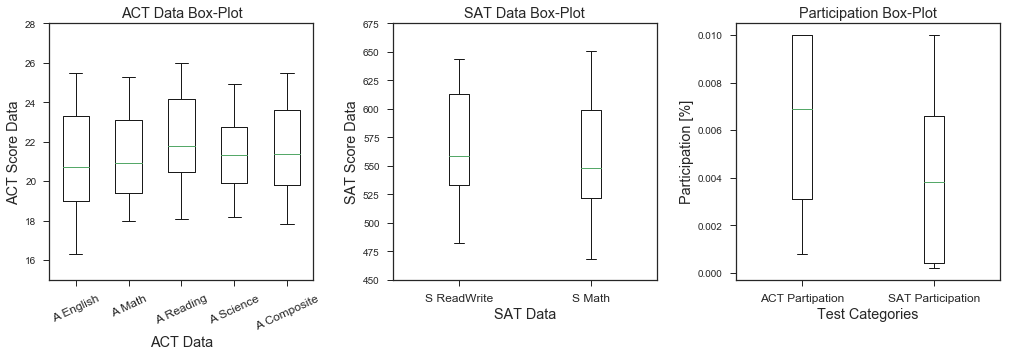

In [149]:
plt.figure(1)

plt.subplot(131)
plt.boxplot([merge_data_hist['ACT_English'],
             merge_data_hist['ACT_Math'],
            merge_data_hist['ACT_Reading'],
            merge_data_hist['ACT_Science'],
            merge_data_hist['ACT_Composite']],showfliers=True);
plt.xticks([1, 2, 3, 4, 5], ['A English', 'A Math', 'A Reading','A Science', 'A Composite'],fontsize='medium',
          rotation=25);
plt.xlabel('ACT Data',fontsize='large');
plt.ylabel('ACT Score Data',fontsize='large');
plt.ylim(15,28);
plt.title('ACT Data Box-Plot',fontsize='large');

plt.subplot(132)
plt.boxplot([merge_data_hist['SAT_ReadWrite'],
             merge_data_hist['SAT_Math']],showfliers=True);
plt.xticks([1, 2], ['S ReadWrite', 'S Math'],fontsize='medium');
plt.xlabel('SAT Data',fontsize='large');
plt.ylabel('SAT Score Data',fontsize='large');
plt.ylim(450,675);
plt.title('SAT Data Box-Plot',fontsize='large');

plt.subplot(133)
plt.boxplot([merge_data_hist['ACT_Participation'],
             merge_data_hist['SAT_Participation']],showfliers=True);
plt.xticks([1, 2], ['ACT Partipation', 'SAT Participation'],fontsize='medium');
plt.xlabel('Test Categories',fontsize='large');
plt.ylabel('Participation [%]',fontsize='large');
# plt.ylim(15,28);
plt.title('Participation Box-Plot',fontsize='large');

plt.subplots_adjust(top=0.9, 
                    bottom=.01, 
                    left=.2, 
                    right=2.4, 
                    hspace=.8,
                    wspace=0.3)


In [51]:
merge_data_hist[['State','SAT_Participation']].sort_values('SAT_Participation',ascending=True).head(20)


,State,SAT_Participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
23,Minnesota,0.03
50,Wyoming,0.03


##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [52]:
merge_data_hist[['State','SAT_Participation']].sort_values('SAT_Participation').head(15)

,State,SAT_Participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
23,Minnesota,0.03
50,Wyoming,0.03


## Step 4: Descriptive and Inferential Statistics

In [53]:
import scipy.stats as stats

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [54]:
def summary_stats(column,series):
    mean = np.mean(series)
    median = np.median(series)
    mode = stats.mode(series)
    var = np.var(series)
    std = np.std(series)
    print(column.upper())
    if mean < median:
        print('NEGATIVE SKEW')
    elif mean > median:
        print('POSITIVE SKEW')
    else:
        print('SYMETRIC')
    return('mean = {}, median = {}, mode = {}, var = {}, std = {}'.format(np.around(mean,3),
                                                                          np.around(median,3),
                                                                          np.around(mode,3),
                                                                          np.around(var,3),
                                                                          np.around(std,3)))

In [55]:
#SAT Participation
print(summary_stats('SAT_Participation',merge_data_hist['SAT_Participation']))
print(summary_stats('SAT_ReadWrite',merge_data_hist['SAT_ReadWrite']))
print(summary_stats('SAT_Math',merge_data_hist['SAT_Math']))
print(summary_stats('SAT_Total',merge_data_hist['SAT_Total']))
print(summary_stats('ACT_Participation',merge_data_hist['ACT_Participation']))
print(summary_stats('ACT_English',merge_data_hist['ACT_English']))
print(summary_stats('ACT_Math',merge_data_hist['ACT_Math']))
print(summary_stats('ACT_Reading',merge_data_hist['ACT_Reading']))
print(summary_stats('ACT_Science',merge_data_hist['ACT_Science']))
print(summary_stats('ACT_Composite',merge_data_hist['ACT_Composite']))


SAT_PARTICIPATION
POSITIVE SKEW
mean = 0.398, median = 0.38, mode = [[ 0.03]
 [ 8.  ]], var = 0.122, std = 0.349
SAT_READWRITE
POSITIVE SKEW
mean = 569.118, median = 559.0, mode = [[ 513.]
 [   3.]], var = 2044.574, std = 45.217
SAT_MATH
NEGATIVE SKEW
mean = 547.627, median = 548.0, mode = [[ 524.]
 [   2.]], var = 7068.195, std = 84.073
SAT_TOTAL
POSITIVE SKEW
mean = 1126.098, median = 1107.0, mode = [[ 1005.]
 [    2.]], var = 8387.539, std = 91.584
ACT_PARTICIPATION
NEGATIVE SKEW
mean = 0.653, median = 0.69, mode = [[  1.]
 [ 17.]], var = 0.101, std = 0.318
ACT_ENGLISH
POSITIVE SKEW
mean = 20.931, median = 20.7, mode = [[ 19.]
 [  3.]], var = 5.431, std = 2.33
ACT_MATH
POSITIVE SKEW
mean = 21.182, median = 20.9, mode = [[ 19.4]
 [  4. ]], var = 3.851, std = 1.962
ACT_READING
POSITIVE SKEW
mean = 22.014, median = 21.8, mode = [[ 20.1]
 [  3. ]], var = 4.19, std = 2.047
ACT_SCIENCE
NEGATIVE SKEW
mean = 21.041, median = 21.3, mode = [[ 20.5]
 [  3. ]], var = 9.929, std = 3.151
ACT_COMP

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [57]:
stats.ttest_ind(merge_data_hist['SAT_Participation'], merge_data_hist['ACT_Participation'])

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [58]:
def conf(data,column,confid):   
    sample_mean = data[column].mean()
    z_star = stats.norm.ppf(confid)
    sigma = data[column].std()
    n = data[column].count()
    low_end = sample_mean - z_star * sigma
    high_end = sample_mean + z_star * sigma
    return (sample_mean,low_end, high_end)

In [59]:
#SAT Participation confidence intervals
conf(merge_data_hist,'SAT_Participation',0.95)

(0.39803921568627459, -0.18220974967336828, 0.97828818104591742)

>95% confident that the mean is between -0.18 and 0.97

In [63]:
#ACT Participation confidence intervals
conf(merge_data_hist,'ACT_Participation',0.95)

(0.65254901960784317, 0.12387921397678603, 1.1812188252389002)

>95% confident that the mean is between 0.652 and 1.18

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No because the box plot data suggested that the distributions were different.  The hypothesis suggests a 95% confidence that the distributions are different 
(p < alpha).  
> - Ho = muSAT = muACT 
> - Ha = muSAT = muACT

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [64]:
print(np.cov(merge_data_hist['SAT_Math'], merge_data_hist['ACT_Math']))

[[  7.20955843e+03  -5.73707059e+01]
 [ -5.73707059e+01   3.92828235e+00]]


In [65]:
print(np.corrcoef(merge_data_hist['SAT_Math'], merge_data_hist['ACT_Math']))

[[ 1.        -0.3409059]
 [-0.3409059  1.       ]]


According to the data there is week correlation coefficient -0.34.  It does suggest that ACT Math portion does not prepare student for the SAT test or that the SAT test appears to be more rigorous.  

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

It does not make sense because the given data suggest that since p < alpha that we reject Ho: muSrate = muArate so we can conclude that the alternate hypothesis is true at a 95% confience. 